In [33]:
# Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [34]:
# Read in cleaned data from csv

crime_data_csv = Path("../../chicago_crimes_all_cleaned.csv")

crime_df = pd.read_csv(crime_data_csv)

crime_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145697,JF420379,9/16/2022 13:48,026XX N NARRAGANSETT AVE,THEFT (ALL TYPES),RETAIL THEFT,25,36.0,2022,41.928077,-87.785606,"(41.928076536, -87.785606186)",41309.0,60707.0
1145698,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",72113.0,60657.0
1145699,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",64489.0,60628.0
1145700,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",48973.0,60649.0


In [35]:
# Calculate crimes per year

crime_df["Year"].value_counts().sort_index

<bound method Series.sort_index of 2018    258975
2019    254521
2022    228867
2020    204272
2021    199067
Name: Year, dtype: int64>

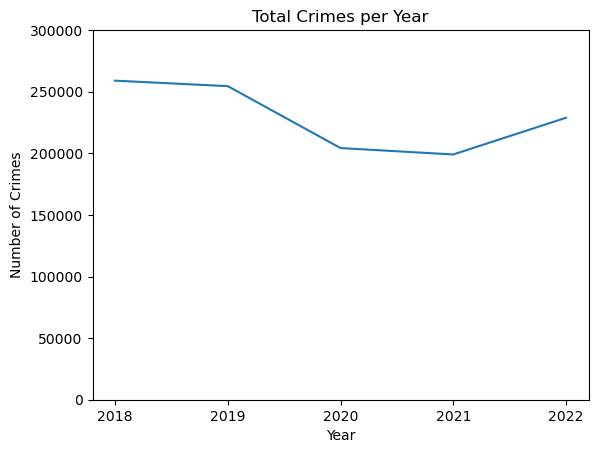

In [36]:
# Display total crimes per year

x_axis = crime_df["Year"].unique()
y_axis = crime_df["Year"].value_counts().sort_index()
plt.xticks(x_axis)
plt.title("Total Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.plot(x_axis, y_axis)
plt.ylim(0, 300000)

plt.savefig("Images/total.png")

In [37]:
# Create data frame grouped by type of crime and year

grouped_df = crime_df.groupby(["Primary Type", "Year"])[["Case Number"]].count().sort_values(by = ["Primary Type", "Year"], ascending = True)

# Display grouped data frame

grouped_df


Case Number
Primary Type                     Year             
ARSON                            2018          368
                                 2019          365
                                 2020          574
                                 2021          518
                                 2022          412
ASSAULT & BATTERY                2018        69402
                                 2019        69502
                                 2020        59087
                                 2021        60132
                                 2022        60980
DRUG RELATED                     2018        12696
                                 2019        14894
                                 2020         7227
                                 2021         4064
                                 2022         3938
HOMICIDE                         2018          598
                                 2019          499
                                 2020          789
                                 2021          804
                                 2022          716
KIDNAPPING AND HUMAN TRAFFICKING 2018          177
                                 2019          182
                                 2020          122
                                 2021           93
                                 2022          129
MINOR PROPERTY CRIME             2018        34041
                                 2019        32908
                                 2020        28405
                                 2021        27735
                                 2022        30542
NON-CRIMINAL (SUBJECT SPECIFIED) 2018            3
OFFENSE INVOLVING CHILDREN       2018         2155
                                 2019         2302
                                 2020         1835
                                 2021         1728
                                 2022         1775
OTHER MINOR CRIMES               2018        20614
                                 2019        20649
                                 2020        14572
                                 2021        14622
                                 2022        15613
SEXUAL RELATED CRIME             2018         2581
                                 2019         2846
                                 2020         2002
                                 2021         2386
                                 2022         2590
THEFT (ALL TYPES)                2018       110812
                                 2019       103876
                                 2020        81199
                                 2021        77978
                                 2022       103407
WEAPONS RELATED CRIME            2018         5528
                                 2019         6498
                                 2020         8460
                                 2021         9007
                                 2022         8765

In [38]:
# Set variables for the count of each type of crime by year

years = crime_df["Year"].unique()
theft_counts = grouped_df.iloc[46:51, 0]
assault_counts = grouped_df.iloc[5:10, 0]
property_counts = property_counts = grouped_df.iloc[25:30, 0]
minor_counts = grouped_df.iloc[36:41, 0]
drug_counts = grouped_df.iloc[10:15, 0]
weapons_counts = grouped_df.iloc[51:56, 0]
sexual_counts = grouped_df.iloc[41:46, 0]
children_counts = children_counts = grouped_df.iloc[31:36, 0]
homicide_counts = grouped_df.iloc[15:20, 0]
arson_counts = grouped_df.iloc[0:5, 0]
kidnapping_counts = grouped_df.iloc[20:25, 0]


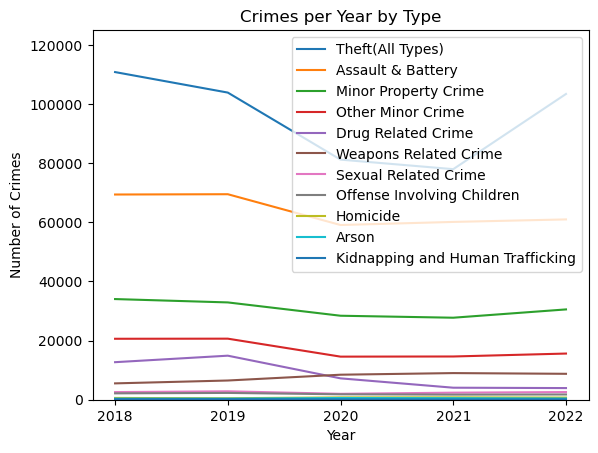

In [39]:
# Plot all types of crime by year

plt.plot(years, theft_counts, label="Theft(All Types)")
plt.plot(years, assault_counts, label="Assault & Battery")
plt.plot(years, property_counts, label="Minor Property Crime")
plt.plot(years, minor_counts, label="Other Minor Crime")
plt.plot(years, drug_counts, label="Drug Related Crime")
plt.plot(years, weapons_counts, label="Weapons Related Crime")
plt.plot(years, sexual_counts, label="Sexual Related Crime")
plt.plot(years, children_counts, label="Offense Involving Children")
plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.plot(years, kidnapping_counts, label="Kidnapping and Human Trafficking")
plt.xticks(years)
plt.title("Crimes per Year by Type")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 125000)
plt.legend(loc="best")
plt.savefig("Images/all_types.png")
plt.show()


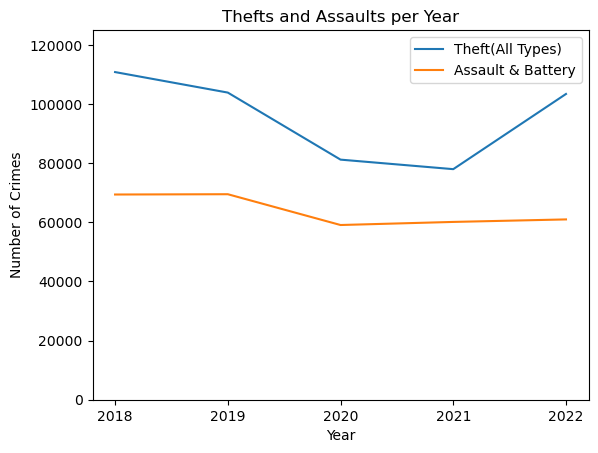

In [40]:
# Plot most common types of crime by year

plt.plot(years, theft_counts, label="Theft(All Types)")
plt.plot(years, assault_counts, label="Assault & Battery")
plt.xticks(years)
plt.title("Thefts and Assaults per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 125000)
plt.legend(loc="best")
plt.savefig("Images/most_common.png")
plt.show()

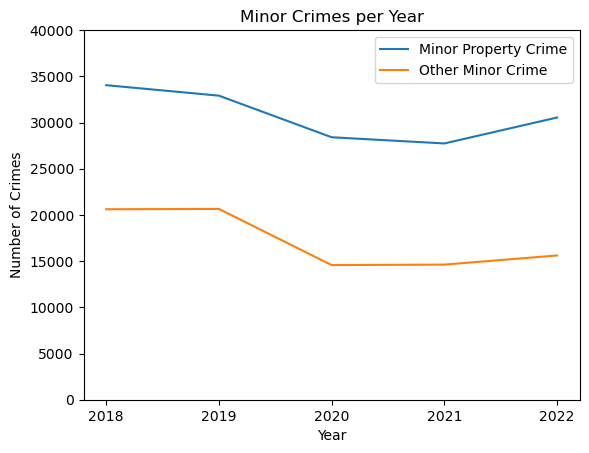

In [41]:
# Plot minor types of crime by year

plt.plot(years, property_counts, label="Minor Property Crime")
plt.plot(years, minor_counts, label="Other Minor Crime")
plt.xticks(years)
plt.title("Minor Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 40000)
plt.legend(loc="best")
plt.savefig("Images/minor.png")
plt.show()

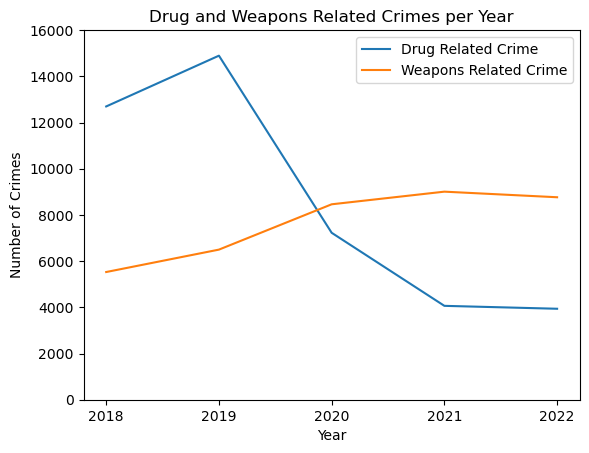

In [42]:
# Plot drug and weapons crime by year

plt.plot(years, drug_counts, label="Drug Related Crime")
plt.plot(years, weapons_counts, label="Weapons Related Crime")
plt.xticks(years)
plt.title("Drug and Weapons Related Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 16000)
plt.legend(loc="best")
plt.savefig("Images/drugs_weapons.png")
plt.show()

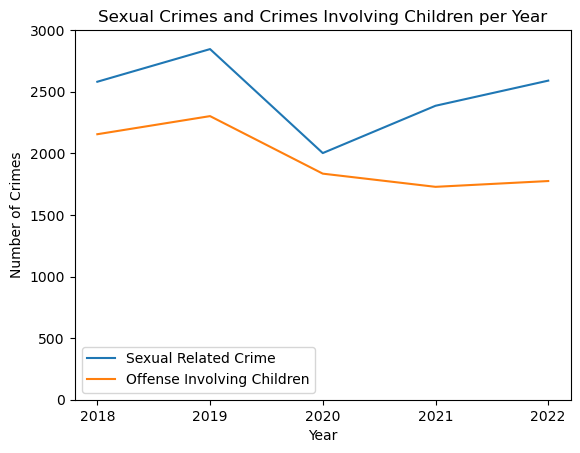

In [43]:
# Plot other types of crime by year

plt.plot(years, sexual_counts, label="Sexual Related Crime")
plt.plot(years, children_counts, label="Offense Involving Children")
plt.xticks(years)
plt.title("Sexual Crimes and Crimes Involving Children per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 3000)
plt.legend(loc="best")
plt.savefig("Images/other.png")
plt.show()

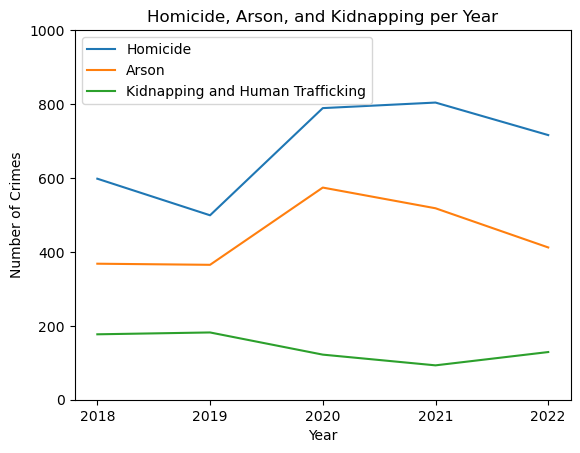

In [44]:
# Plot least common types of crime

plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.plot(years, kidnapping_counts, label="Kidnapping and Human Trafficking")
plt.xticks(years)
plt.title("Homicide, Arson, and Kidnapping per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 1000)
plt.legend(loc="best")
plt.savefig("Images/least_common.png")
plt.show()

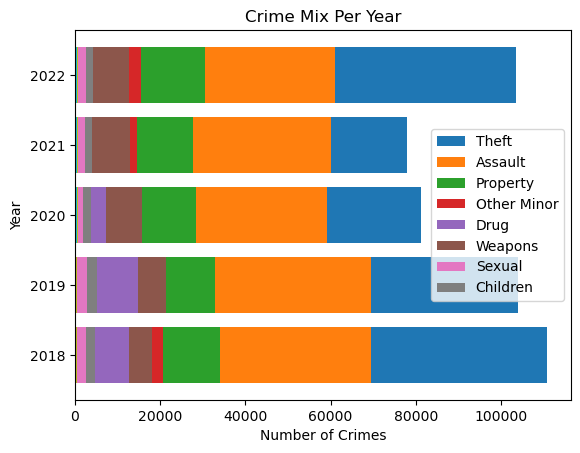

In [121]:
# Create stacked bar chart with crime types by year

plt.barh(years, theft_counts, label = "Theft")
plt.barh(years, assault_counts, label = "Assault")
plt.barh(years, property_counts, label = "Property")
plt.barh(years, minor_counts, label = "Other Minor")
plt.barh(years, drug_counts, label = "Drug")
plt.barh(years, weapons_counts, left = drug_counts, label= "Weapons")
plt.barh(years, sexual_counts, label = "Sexual")
plt.barh(years, children_counts, left = sexual_counts, label = "Children")
plt.barh(years, homicide_counts)
plt.barh(years, arson_counts)
plt.barh(years, kidnapping_counts)
plt.legend(loc="right")
plt.title("Crime Mix Per Year")
plt.xlabel("Number of Crimes")
plt.ylabel("Year")
plt.savefig("Images/stacked_bar.png")
plt.show()

In [148]:
# Create new data frame with the totals by category by year

year_totals = pd.crosstab(index=crime_df['Year'], columns=crime_df['Primary Type'])

# Clean new data frame to put in same order as above bar chart

year_totals = year_totals[["KIDNAPPING AND HUMAN TRAFFICKING", "ARSON", "HOMICIDE", "OFFENSE INVOLVING CHILDREN", "SEXUAL RELATED CRIME", 
                           "WEAPONS RELATED CRIME", "DRUG RELATED", "OTHER MINOR CRIMES", "MINOR PROPERTY CRIME", "ASSAULT & BATTERY", "THEFT (ALL TYPES)"]]

year_totals

Primary Type,KIDNAPPING AND HUMAN TRAFFICKING,ARSON,HOMICIDE,OFFENSE INVOLVING CHILDREN,SEXUAL RELATED CRIME,WEAPONS RELATED CRIME,DRUG RELATED,OTHER MINOR CRIMES,MINOR PROPERTY CRIME,ASSAULT & BATTERY,THEFT (ALL TYPES)
Year,,,,,,,,,,,
2018,177,368,598,2155,2581,5528,12696,20614,34041,69402,110812
2019,182,365,499,2302,2846,6498,14894,20649,32908,69502,103876
2020,122,574,789,1835,2002,8460,7227,14572,28405,59087,81199
2021,93,518,804,1728,2386,9007,4064,14622,27735,60132,77978
2022,129,412,716,1775,2590,8765,3938,15613,30542,60980,103407


In [150]:
# Create new data frame with the proportion by category by year

year_proportions = pd.crosstab(index=crime_df['Year'], columns=crime_df['Primary Type'], normalize="index")

# Clean new data frame to put in same order as above bar chart

year_proportions = year_proportions[["KIDNAPPING AND HUMAN TRAFFICKING", "ARSON", "HOMICIDE", "OFFENSE INVOLVING CHILDREN", "SEXUAL RELATED CRIME", 
                           "WEAPONS RELATED CRIME", "DRUG RELATED", "OTHER MINOR CRIMES", "MINOR PROPERTY CRIME", "ASSAULT & BATTERY", "THEFT (ALL TYPES)"]]
year_proportions

Primary Type,KIDNAPPING AND HUMAN TRAFFICKING,ARSON,HOMICIDE,OFFENSE INVOLVING CHILDREN,SEXUAL RELATED CRIME,WEAPONS RELATED CRIME,DRUG RELATED,OTHER MINOR CRIMES,MINOR PROPERTY CRIME,ASSAULT & BATTERY,THEFT (ALL TYPES)
Year,,,,,,,,,,,
2018,0.000683,0.001421,0.002309,0.008321,0.009966,0.021346,0.049024,0.079598,0.131445,0.267987,0.427887
2019,0.000715,0.001434,0.001961,0.009044,0.011182,0.025530,0.058518,0.081129,0.129294,0.273070,0.408123
2020,0.000597,0.002810,0.003862,0.008983,0.009801,0.041415,0.035379,0.071336,0.139055,0.289256,0.397504
2021,0.000467,0.002602,0.004039,0.008680,0.011986,0.045246,0.020415,0.073453,0.139325,0.302069,0.391717
2022,0.000564,0.001800,0.003128,0.007756,0.011317,0.038297,0.017206,0.068219,0.133449,0.266443,0.451821


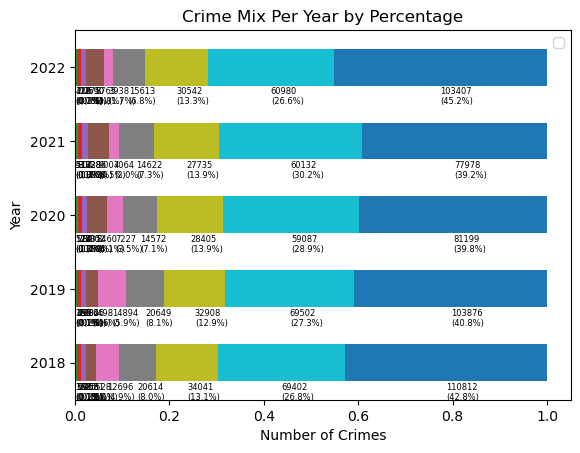

In [185]:
# Graph crime mix as a percentage of the total

year_proportions.plot(kind="barh", stacked=True)
for n, x in enumerate([*year_totals.index.values]):
    for (proportion, count, y_loc) in zip(year_proportions.loc[x],
                                          year_totals.loc[x],
                                          year_proportions.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.5,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 fontsize=6)
        
plt.legend("")
plt.title("Crime Mix Per Year by Percentage")
plt.xlabel("Number of Crimes")
plt.ylabel("Year")
plt.savefig("Images/percentage_bar.png")

In [173]:
# Reorganize above data frames, switching rows and columns

total_year_columns = pd.crosstab(index=crime_df['Primary Type'], columns=crime_df['Year'])
total_year_columns

Year,2018,2019,2020,2021,2022
Primary Type,,,,,
ARSON,368,365,574,518,412
ASSAULT & BATTERY,69402,69502,59087,60132,60980
DRUG RELATED,12696,14894,7227,4064,3938
HOMICIDE,598,499,789,804,716
KIDNAPPING AND HUMAN TRAFFICKING,177,182,122,93,129
MINOR PROPERTY CRIME,34041,32908,28405,27735,30542
NON-CRIMINAL (SUBJECT SPECIFIED),3,0,0,0,0
OFFENSE INVOLVING CHILDREN,2155,2302,1835,1728,1775
OTHER MINOR CRIMES,20614,20649,14572,14622,15613


In [184]:
proportion_year_columns = pd.crosstab(index=crime_df['Primary Type'], columns=crime_df['Year'], normalize="columns")
proportion_year_columns = proportion_year_columns*100
proportion_year_columns

Year,2018,2019,2020,2021,2022
Primary Type,,,,,
ARSON,0.142099,0.143407,0.280998,0.260214,0.180017
ASSAULT & BATTERY,26.798726,27.306981,28.925648,30.206915,26.644296
DRUG RELATED,4.902404,5.851776,3.537930,2.041524,1.720650
HOMICIDE,0.230910,0.196055,0.386250,0.403884,0.312845
KIDNAPPING AND HUMAN TRAFFICKING,0.068346,0.071507,0.059724,0.046718,0.056365
MINOR PROPERTY CRIME,13.144512,12.929385,13.905479,13.932495,13.344868
NON-CRIMINAL (SUBJECT SPECIFIED),0.001158,0.000000,0.000000,0.000000,0.000000
OFFENSE INVOLVING CHILDREN,0.832127,0.904444,0.898312,0.868049,0.775560
OTHER MINOR CRIMES,7.959842,8.112887,7.133626,7.345266,6.821866


In [ ]:
# Next steps: calculate %change 2018 - 2022. Display in new data frame 
# Maybe also 2018 - 2020 and 2020 - 2022